## QLIPP CALIBRATION NOTEBOOK

In [1]:
import time
from pycromanager import Bridge
import os, sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
import numpy as np
from recOrder.recOrder.calib.Calibration import QLIPP_Calibration
from recOrder.recOrder.calib.CoreFunctions import snap_image

In [2]:
bridge = Bridge(convert_camel_case=False)
mmc = bridge.get_core()
mm = bridge.get_studio()

calib = QLIPP_Calibration(mmc, mm, optimization='min_scalar')

### Notes Before you begin:

* Choose a field of view with no sample for calibration
* Decide whether you want a 4-State Scheme (faster) or a 5-State Scheme (slower, slightly more sensitive?)

Will Calibrate Using this ROI:


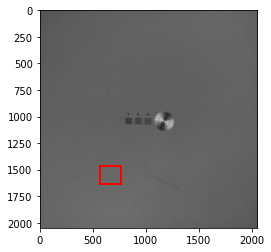

Would You Like to Calibrate Using this ROI? (Yes/No): 	
Calculating Blacklevel ...
Blacklevel: 103.07503418579617

Calibrating State0 (Extinction)...

Starting first grid search, step = 0.1
update (6997.353758, 0.010000, 0.250000)
update (5609.454133, 0.010000, 0.350000)
update (4447.118676, 0.010000, 0.450000)
update (3835.374618, 0.010000, 0.550000)
update (2986.217596, 0.110000, 0.550000)


In [ ]:
%%time

calibration_scheme = '4-State Extinction'
# calibration_scheme = '5-State'
swing = 0.1
wavelength = 546
use_full_FOV = False

meta_file_name = r'Q:\Cameron\Calibration_Testing\metadata_test.txt'

# Run Calibration
calib.run_calibration(calibration_scheme, options=(swing, wavelength, meta_file_name, use_full_FOV))

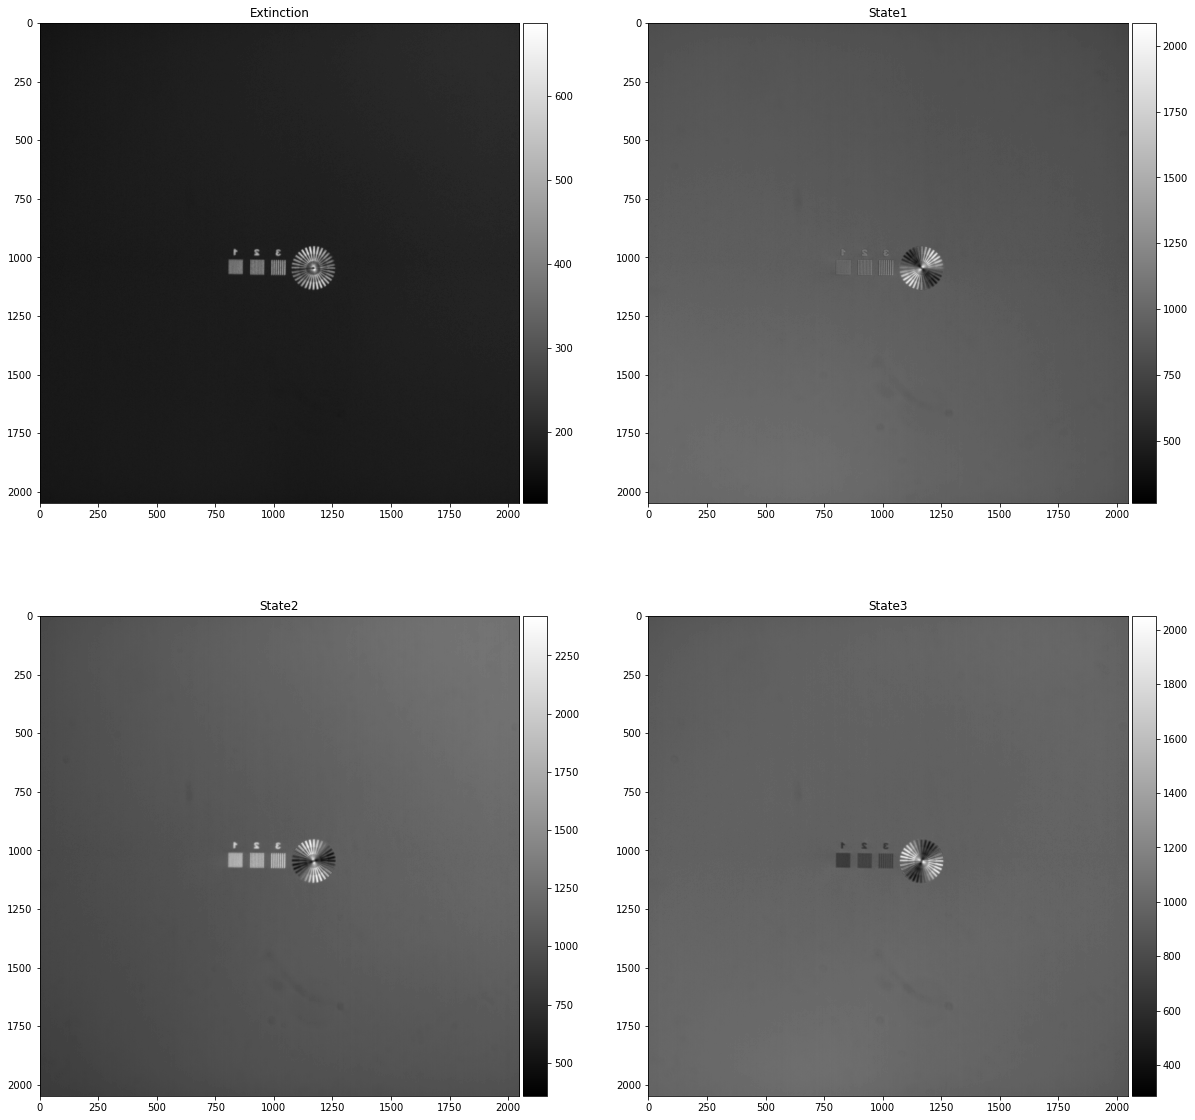

In [4]:
## Take set of BG Images

directory = r'Q:\Cameron\Calibration_Testing\BG'

n_avg = 20

if calibration_scheme == '5-State':
    calib.capture_bg(n_avg, 5, directory)

elif calibration_scheme == '4-State Extinction':
    calib.capture_bg(n_avg, 4, directory)